In [1]:
# Import python packages numpy, matplotlib, and pulp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pulp
from shapely.geometry.polygon import LinearRing, Polygon

# CEE 201: Linear Programming with Jupyter Notebooks

## Multi-Objective Problems & Graphical Interpretation of Noninferiority

Consider the two-objective mathematical program described below:


### Objective Functions & Constraints
#### Maximizing the following functions
$Z_1 =3x_1-2x_2$ \
$Z_2 =-x_1+2x_2$

#### Subject to the following constraints:
$4x_1+8x_2\geq 8$ \
$3x_1-6x_2\leq 6$ \
$4x_1-2x_2 \leq 14$ \
$x_1\leq 6$ \
$-x_1+3x_2\leq 15$ \
$-2x_1+4x_2\leq 18$ \
$-6x_1+3x_2\leq 9$ \
$x_1 \geq 0$ \
$x_2 \geq 0$

#### What is the feasible region?  What is the best solution? 
We will demonstrate the graphical interpretation of noninferiority and how we solve this type of problems by setting up a grand objective function.

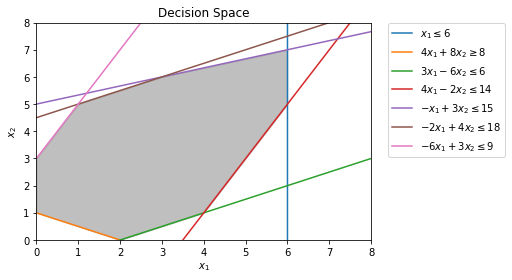

In [9]:
# Construct lines
# x1 > 0
x = np.linspace(0, 20, 2000)
y = np.linspace(0, 20, 2000)

# x1 <= 6
x1 = (y*0) + 6.0
y2 = (8-4*x)/8.0
y3 = (6-3*x)/-6.0
y4 = (14-4*x)/-2.0
y5 = (15+x)/3.0
y6 = (18+2*x)/4.0
y7 = (9+6*x)/3.0


plt.plot(x1, y, label=r'$x_1\leq 6$') # y1 blue
plt.plot(x, y2, label=r'$4x_1+8x_2\geq 8$')
plt.plot(x, y3, label=r'$3x_1-6x_2\leq 6$')
plt.plot(x, y4, label=r'$4x_1-2x_2 \leq 14$')
plt.plot(x, y5, label=r'$-x_1+3x_2\leq 15$')
plt.plot(x, y6, label=r'$-2x_1+4x_2\leq 18$')
plt.plot(x, y7, label=r'$-6x_1+3x_2\leq 9$')
plt.xlim((0, 8))
plt.ylim((0, 8))
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Decision Space')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Fill feasible region
y8 = np.minimum(y6, y7)
y9=np.minimum(y8,y5)
y10 = np.maximum(y4,y2)
y11 = np.maximum(y10,y3)
#y6 = np.minimum(y5, y3)
plt.fill_between(x,y9,y11,where= x<=6,  color='grey', alpha=0.5)

Determine the corner points of the feasible region above.

We examine the value of the two objective function $Z_1$ and $Z_2$ at the 7 corner points, as those are presented in the table below.

| Point | $x_1$  | $x_2$ | $Z_1$ Value | $Z_2$ Value |Noninferiority|
|:-----------------------:|:-----------------------:|-----------------|------------------|-----------|-----------|
| A| 2 | 0 | 6 | -2 | Noninferior |
| B | 4 | 1 | 10 | -2 | Noninferior |
| C | 6 | 5 | 8 | 4 | Noninferior |
| D | 6 | 7 | 4 | 8 | Noninferior |
| E | 3 | 6 | -3 | 9 | Noninferior |
| F | 1 | 5 | -7 | 9 | Dominated by E |
| G | 0 | 3 | -6 | 6 | Dominated by E |
| H | 0 | 1 | -2 | 2 |Noninferior |

Points F and G are dominated by E since E results in greater objective value for both objective values $Z_1$ and $Z_2$. Note that we aim to maximize both objective functions.

We generate the objective space using the objective values $Z_1$ and $Z_2$ as point pairs of the 2 dimensional space.

Text(0, 0.5, '$Z_2$')

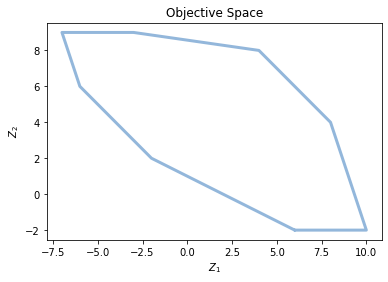

In [7]:
#Generate the polygon that corresponds to the objective space
poly = Polygon([(6, -2), (10, -2), (8, 4),(4, 8),(-3, 9),(-7,9),(-6,6),(-2,2)])
x,y = poly.exterior.xy
plt.plot(x, y, color='#6699cc', alpha=0.7,
    linewidth=3, solid_capstyle='round', zorder=2)
plt.title('Objective Space')
plt.xlabel(r'$Z_1$')
plt.ylabel(r'$Z_2$')

First, note that all the interior points of this objective space polygon are inferior, since we can always find an improvement to both objective function outcomes; thus we are looking for boundary points! In cases that we aim to maximize both objective function values $Z_1$ and $Z_2$, the northeast points of the objective space always dominate.
In that case **a point is noninferior if there is no point positioned on its northeast side (specifically applies to Max-Max problems).** If we were interested in maximize the value of $Z_1$ and minimize the value of $Z_2$, we’ll adhere to the southeast side rule.
![NortheastRule](NorthEast.png)

Note that this method does not provide a single best solution points. Instead, the civil engineer provides comprehensive information about the best available choices in a given problem domain, and the decision maker or policymaker selects among those.